#### This script was originated from: job0010.....ipynb

In [1]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle

import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [4]:
my_start = -2e4  
my_stop = 2.01e4 
my_step = 2000.0

my_variables = list(np.arange(my_start, my_stop, my_step))
#my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[-20000.0, -18000.0, -16000.0, -14000.0, -12000.0, -10000.0, -8000.0, -6000.0, -4000.0, -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0]
21


In [5]:
(pd.__version__)

'1.3.3'

### Load the data

In [9]:
path_to_data = './'

study_name_1 = f'deyRates_sps_200GeV_PN1e-8_400MHz_phaseOffset30deg_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan_4sigmat_2_2ns' # title for save figures
study_name_2 = f'deyRates_sps_200GeV_PN1e-8_400MHz_phaseOffset-30deg_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan_4sigmat_2_2ns'
study_name_3 = f'deyRates_sps_200GeV_PN1e-8_400MHz_phaseOffset_150deg_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan_4sigmat_2_2ns'
study_name_4 = f'deyRates_sps_200GeV_PN1e-8_400MHz_global_30deg_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan'

study_name = f'deyRates_sps_200GeV_PN1e-8_400MHz_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan_4sigmat_2_2ns_phaseOffsets'


noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ))
my_df_3 = pickle.load( open(path_to_data+study_name_3+'.pkl', "rb" ))
my_df_4 = pickle.load( open(path_to_data+study_name_4+'.pkl', "rb" ))

In [10]:
my_df_2

,ayy_-20000.0,ayy_-18000.0,ayy_-16000.0,ayy_-14000.0,ayy_-12000.0,ayy_-10000.0,ayy_-8000.0,ayy_-6000.0,ayy_-4000.0,ayy_-2000.0,...,ayy_2000.0,ayy_4000.0,ayy_6000.0,ayy_8000.0,ayy_10000.0,ayy_12000.0,ayy_14000.0,ayy_16000.0,ayy_18000.0,ayy_20000.0
m,"[1.7240938256800645e-08, 1.8258876500626328e-0...","[1.6970957005445187e-08, 1.834519919848983e-08...","[1.7031058109435807e-08, 1.794068134213734e-08...","[1.6835537910977897e-08, 1.8448969810105072e-0...","[1.6837264646853874e-08, 1.8244422403544347e-0...","[1.6979120403707647e-08, 1.8139564492616097e-0...","[1.6903328074667474e-08, 1.7390611050053432e-0...","[1.7537516625395324e-08, 1.6908066258890686e-0...","[1.7781052144646747e-08, 1.6442617174549817e-0...","[1.422686916472003e-08, 1.4794398097875856e-08...",...,"[1.2052846044037117e-08, 1.2060460821192253e-0...","[1.414939496641589e-08, 1.4363042658103318e-08...","[1.5999181618769008e-08, 1.7642316423521326e-0...","[1.7662457191626507e-08, 1.858342195225111e-08...","[1.8497435145870624e-08, 1.8443764127661276e-0...","[1.8433450632676058e-08, 1.8291215274048117e-0...","[1.8227437795293163e-08, 1.831955763146634e-08...","[1.8221167732208554e-08, 1.8848782246857508e-0...","[1.7635850299827947e-08, 1.859387860154966e-08...","[1.7821721319494213e-08, 1.8577215828525212e-0..."
b,"[2.3017628527711164e-06, 2.2993675416730776e-0...","[2.30094759345934e-06, 2.2994525607689683e-06,...","[2.301323457089094e-06, 2.2972303915569585e-06...","[2.299021296921871e-06, 2.2971544516446635e-06...","[2.2977960396380906e-06, 2.299969753469177e-06...","[2.2996548394132584e-06, 2.2977583189998322e-0...","[2.299542197833816e-06, 2.2983760007506695e-06...","[2.3025083795115804e-06, 2.2996078137478783e-0...","[2.3007737931582984e-06, 2.3001257277301196e-0...","[2.3024269066620623e-06, 2.299152043875884e-06...",...,"[2.3003182255453683e-06, 2.300727389865346e-06...","[2.3033538136068567e-06, 2.2979744966570304e-0...","[2.2988277227122453e-06, 2.3005961109198885e-0...","[2.300211352864955e-06, 2.2979552898906634e-06...","[2.299770048795714e-06, 2.299604024519629e-06,...","[2.3004259171432137e-06, 2.299450066525146e-06...","[2.2951257560840516e-06, 2.300044334203325e-06...","[2.297156380899624e-06, 2.2958872313491816e-06...","[2.3014628971205043e-06, 2.2973757724734847e-0...","[2.3016891730514487e-06, 2.298817382131679e-06..."
err,"[1.9507860985834553e-11, 1.6830569507603923e-1...","[2.1265726097491762e-11, 1.7881586039707343e-1...","[2.4641726949913306e-11, 2.113963006547837e-11...","[2.960061912832867e-11, 2.0463523866276158e-11...","[3.250817569929095e-11, 2.513805907861262e-11,...","[3.030604223822571e-11, 3.375452818472672e-11,...","[2.8429595997946888e-11, 3.167129300508557e-11...","[2.4911367857615824e-11, 1.970177923389501e-11...","[2.0487047878717816e-11, 2.6469814217465986e-1...","[3.1707269021650606e-11, 2.168301943300625e-11...",...,"[3.885701519963337e-11, 4.716070404207909e-11,...","[2.1448575103483496e-11, 2.0720588709983205e-1...","[3.701307393179261e-11, 3.026570278930409e-11,...","[3.9905722446401104e-11, 4.802817503589462e-11...","[2.973183610425217e-11, 1.986716333274784e-11,...","[2.1127775331356893e-11, 1.948396792685814e-11...","[2.5697128297890107e-11, 2.170570715665949e-11...","[1.831292568681107e-11, 2.6574229046172563e-11...","[2.1858639810359703e-11, 2.9065255482089957e-1...","[1.868722960972998e-11, 2.7863693619117764e-11..."


In [11]:
my_df_keys = list(my_df_2.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_-20000.0', 'ayy_-18000.0', 'ayy_-16000.0', 'ayy_-14000.0', 'ayy_-12000.0', 'ayy_-10000.0', 'ayy_-8000.0', 'ayy_-6000.0', 'ayy_-4000.0', 'ayy_-2000.0', 'ayy_0.0', 'ayy_2000.0', 'ayy_4000.0', 'ayy_6000.0', 'ayy_8000.0', 'ayy_10000.0', 'ayy_12000.0', 'ayy_14000.0', 'ayy_16000.0', 'ayy_18000.0', 'ayy_20000.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

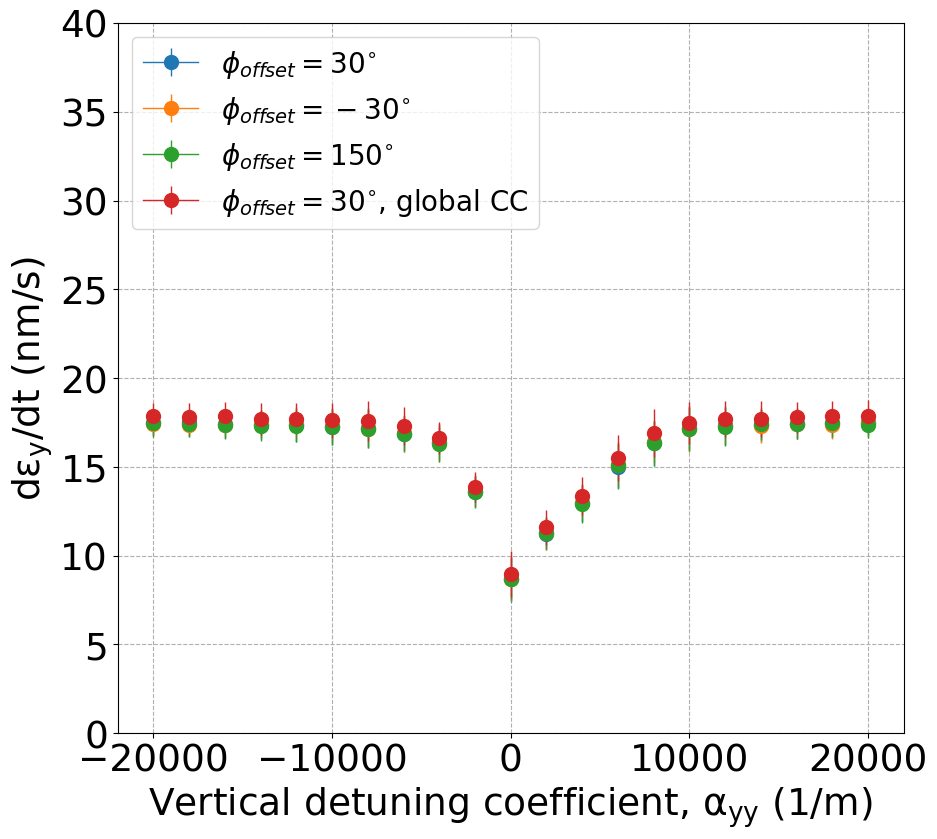

In [13]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = r'$\phi_{offset}=30^{\circ}$'
        my_label_2 = r'${\phi_{offset}=-30^{\circ}}$'
        my_label_3 = r'${\phi_{offset}=150^{\circ}}$'
        my_label_4 = r'${\phi_{offset}=30^{\circ}}$'+', global CC'
    else:
        my_label_1 = my_label_2 = my_label_3 = my_label_4 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    # errors for study 3
    systematic_error_3 = np.std(my_df_3[my_df_keys[i]]['m'])
    statistical_error_3 = np.sqrt(np.mean(np.array(my_df_3[my_df_keys[i]]['err'])**2))
    total_error_3 = np.sqrt(systematic_error_3**2+statistical_error_3**2)
    
    # errors for study 4
    systematic_error_4 = np.std(my_df_4[my_df_keys[i]]['m'])
    statistical_error_4 = np.sqrt(np.mean(np.array(my_df_4[my_df_keys[i]]['err'])**2))
    total_error_4 = np.sqrt(systematic_error_4**2+statistical_error_4**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    plt.errorbar(my_variables[i], np.mean(my_df_3[my_df_keys[i]]['m'])*1e9, yerr=total_error_3*1e9, marker='o',  c='C2', label=my_label_3)
    plt.errorbar(my_variables[i], np.mean(my_df_4[my_df_keys[i]]['m'])*1e9, yerr=total_error_4*1e9, marker='o',  c='C3', label=my_label_4)
    
    
plt.legend(loc=2)

#plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}.png', bbox_inches='tight')
plt.show()

### Compute the theoretically expected rate

In [14]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
clight = 299792458 # m/s
Vcc = 1e6 # V
Eb = 200e9 # 270e9 eV
gamma_0 = 213.16 # for 200 GeV  # 287.8 for 270 GeV
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
tau = 2.2e-9 # 4 sigma_t [s] # 1.7e-9
sigma_z = clight*tau/4 #0.155  # m
print(f'sigma_z = {sigma_z} m')
f_CC = 400e6 # CC frequency in Hz

# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

sigma_z = 0.1648858519 m
psd phi: 9.221796100020633e-11 rad^2/Hz, psd A: 0.0 V^2/Hz


In [15]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    print(expected_growth)
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.510947348428828, CDeltaA = 0.24452632578558595
1.7435976910472817e-08
expected growth = 17.435976910472817 nm/s


### Compute the rms detuning with amplitude

In [16]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_bunch = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
path_to_bunch='./'
bunch = pickle.load(open(path_to_bunch+'bunch_IPAC', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

PyHEADTAIL v1.13.5




In [17]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=7.98866664187745e-09 m
rms(Jy)=7.97627199081245e-09 m


In [18]:
Dqy_rms = []
axy=0
for ayy in my_variables:
    Dqy_rms.append(rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy))

limits in primary x axis 20000
limits in secondary x axis 3.1954666567509804


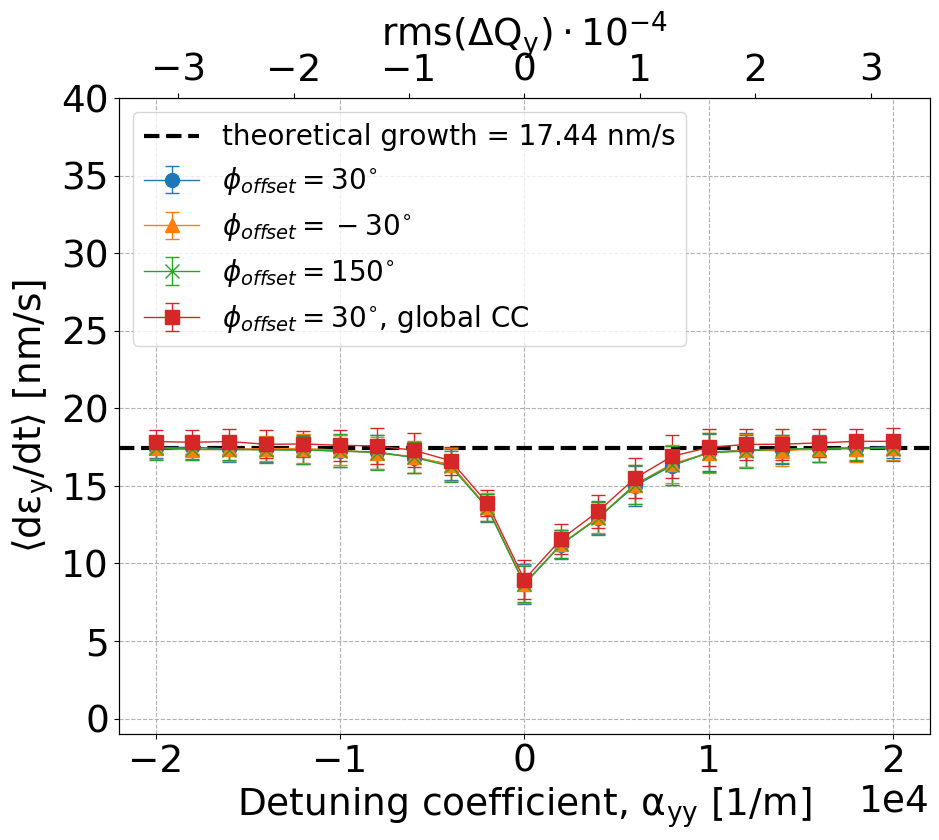

In [29]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_df1, points_df2, points_df3, points_df4 = [], [], [], []


for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = r'$\phi_{offset}=30^{\circ}$'
        my_label_2 = r'${\phi_{offset}=-30^{\circ}}$'
        my_label_3 = r'${\phi_{offset}=150^{\circ}}$'
        my_label_4 = r'${\phi_{offset}=30^{\circ}}$' + ', global CC'
        
    else:
        my_label_1 = my_label_2 = my_label_3 = my_label_4 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    # errors for study 3
    systematic_error_3 = np.std(my_df_3[my_df_keys[i]]['m'])
    statistical_error_3 = np.sqrt(np.mean(np.array(my_df_3[my_df_keys[i]]['err'])**2))
    total_error_3 = np.sqrt(systematic_error_3**2+statistical_error_3**2)
    
    # errors for study 4
    systematic_error_4 = np.std(my_df_4[my_df_keys[i]]['m'])
    statistical_error_4 = np.sqrt(np.mean(np.array(my_df_4[my_df_keys[i]]['err'])**2))
    total_error_4 = np.sqrt(systematic_error_4**2+statistical_error_4**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5,  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='^', capsize=5, c='C1', label=my_label_2)
    ax.errorbar(my_variables[i], np.mean(my_df_3[my_df_keys[i]]['m'])*1e9, yerr=total_error_3*1e9, marker='x', capsize=5, c='C2', label=my_label_3)
    ax.errorbar(my_variables[i], np.mean(my_df_4[my_df_keys[i]]['m'])*1e9, yerr=total_error_4*1e9, marker='s', capsize=5, c='C3', label=my_label_4)
    
    
    
    points_df1.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_df2.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    points_df3.append(np.mean(my_df_3[my_df_keys[i]]['m'])*1e9)
    points_df4.append(np.mean(my_df_4[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_df1, c='C0')
ax.plot(my_variables, points_df2, c='C1')
ax.plot(my_variables, points_df3, c='C2')
ax.plot(my_variables, points_df4, c='C3')
    
ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=2)

# x-axis limits
ax_lim, ax2_lim = 20000, Dqy_rms[-1]*1e4
print(f'limits in primary x axis {ax_lim}')
print(f'limits in secondary x axis {ax2_lim}')

# lim +10% of the max value
ax.set_xlim(-ax_lim+(-ax_lim/10), ax_lim+ax_lim/10)
ax2.set_xticks(np.arange(-3, 4, 1))
ax2.set_xlim(-ax2_lim+(-ax2_lim/10), ax2_lim+ax2_lim/10)

# y-axis limits
ax.set_yticks(np.arange(0,45,5))
ax.set_ylim(-1, 40)


ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpread_v2.png', bbox_inches='tight')

plt.show()